In [192]:
# Download the data set here

# https://figshare.com/articles/dataset/creditcard_Dataset/29270873?file=55234994


# Unbalanced Data  - Target data is not distributed uniformly
1. Remote Village - where no crime happens - living among innocent people
2. Metro Busy Urban - living among Both good and bad people
3. Police Officer  - Day in and Day out see the criminal


# 1. Oversampling
# 2. Undersampling




In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('creditcard 2.csv')

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [182]:
data.duplicated().sum()

np.int64(1081)

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Finance, Health
# PII

In [11]:
data.shape

(284807, 31)

In [12]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [13]:
data['Class'].value_counts(normalize = True)

,proportion
Class,
0,0.998273
1,0.001727


<Axes: xlabel='Class'>

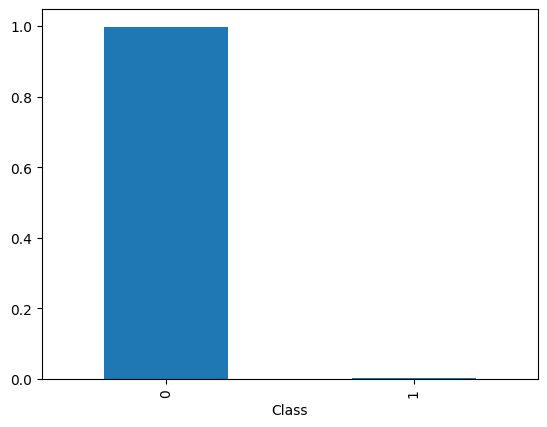

In [14]:
data['Class'].value_counts(normalize = True).plot(kind = 'bar')

# 1. Oversampling

## 0 - 284315
## 1 - 284315


# 2. Undersampling

## 0 - 492
## 1 - 492

In [15]:
data['Time'].value_counts()

,count
Time,
163152.0,36
64947.0,26
68780.0,25
3767.0,21
3770.0,20
...,...
172748.0,1
172749.0,1
172754.0,1


In [16]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: xlabel='Amount', ylabel='Class'>

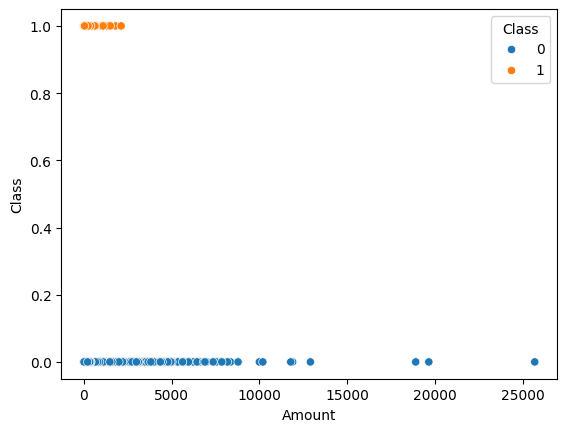

In [17]:
sns.scatterplot(x = 'Amount', y = 'Class', data = data, hue = 'Class')

In [87]:
X = data.drop(columns = 'Class')

In [88]:
y = data['Class']

In [89]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)
# Stratified Split



```
Train =      60
Test =       20
Validation = 20



Train = Model
Test = Experiment phase

Once Experiment is done

Validation = Test on final model after experimentation
```



In [22]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [23]:
data['Class'].value_counts(),train_y.value_counts(), test_y.value_counts()

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [24]:
data['Class'].value_counts(normalize=True),train_y.value_counts(normalize=True), test_y.value_counts(normalize=True)

(Class
 0    0.998273
 1    0.001727
 Name: proportion, dtype: float64,
 Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)



```
10
6 - 0
4 - 1

Stratified sample

50.      
3 - 0
2 - 1

50.      
3 - 0
2 - 1```



In [26]:
model_unbalanced = LogisticRegression(max_iter=1000)
model_unbalanced.fit(train_X, train_y)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
train_pred = model_unbalanced.predict(train_X)
test_pred = model_unbalanced.predict(test_X)


In [28]:
print('Train Accuracy: ', accuracy_score(train_y, train_pred))
print('Test Accuracy: ', accuracy_score(test_y, test_pred))


Train Accuracy:  0.9992012113498212
Test Accuracy:  0.9989817773252344


In [29]:
print("Train Confusion Matrix : \n",confusion_matrix(train_y, train_pred))
print("Test Confusion Matrix : \n",confusion_matrix(test_y, test_pred))

Train Confusion Matrix : 
 [[227417     34]
 [   148    246]]
Test Confusion Matrix : 
 [[56852    12]
 [   46    52]]


In [30]:
data['Class'].value_counts(),train_y.value_counts(), test_y.value_counts()

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [31]:
print("Train classification Report : \n",classification_report(train_y, train_pred))
print("Test classification Report : \n",classification_report(test_y, test_pred))

Train classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.62      0.73       394

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.86    227845
weighted avg       1.00      1.00      1.00    227845

Test classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.53      0.64        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962





```
0 - 200. - 80
1 - 800. - 70


macro average = 80+70/2 - 75

weighted average = 80*200+800*70/1000 = 72
```



In [33]:
print("Train ROC_AUC_SCORE Report : \n",roc_auc_score(train_y, train_pred))
print("Test ROC_AUC_SCORE Report : \n",roc_auc_score(test_y, test_pred))

Train ROC_AUC_SCORE Report : 
 0.8121079997438841
Test ROC_AUC_SCORE Report : 
 0.7652006075362053


In [46]:
test_y_probablity= model_unbalanced.predict_proba(test_X)[:,1]

In [48]:
test_y_probablity

array([9.99998333e-01, 1.13074021e-04, 1.38268990e-04, ...,
       5.12887742e-03, 8.63466928e-05, 3.96321399e-04])

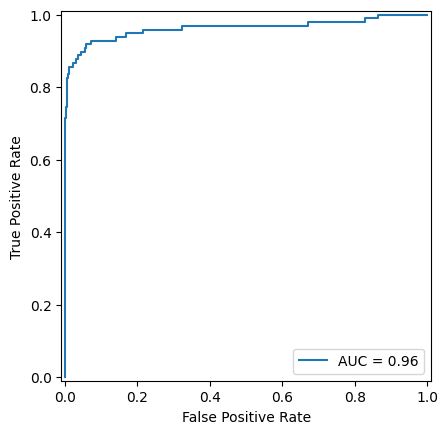

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_probablity)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

Metrics calculated for various thresholds.


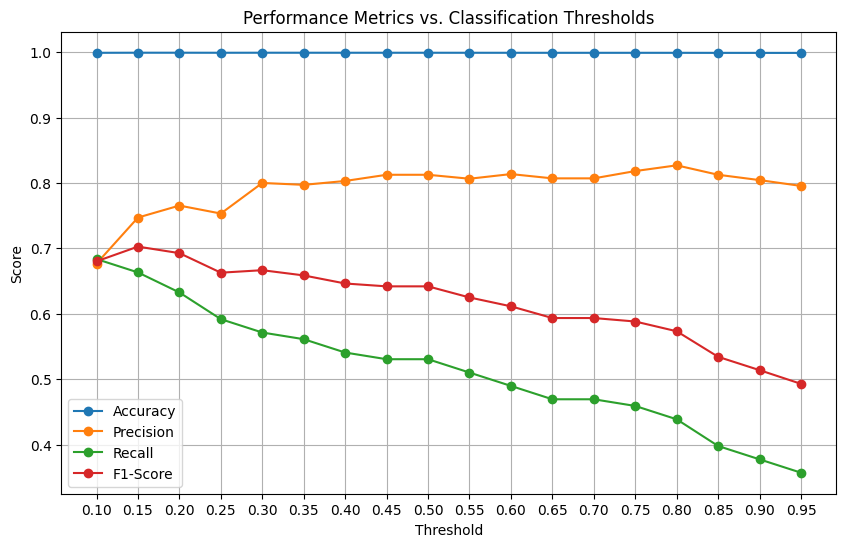

Plotting of performance metrics against classification thresholds is complete.


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate a range of classification thresholds
thresholds = np.arange(0.1, 1.0, 0.05)

# Get predicted probabilities for the test set
y_pred_proba = model_unbalanced.predict_proba(test_X)[:, 1]

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate through each threshold and calculate metrics
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)

    accuracy_scores.append(accuracy_score(test_y, y_pred_threshold))
    precision_scores.append(precision_score(test_y, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(test_y, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(test_y, y_pred_threshold, zero_division=0))

print("Metrics calculated for various thresholds.")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')

plt.title('Performance Metrics vs. Classification Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

print('Plotting of performance metrics against classification thresholds is complete.')

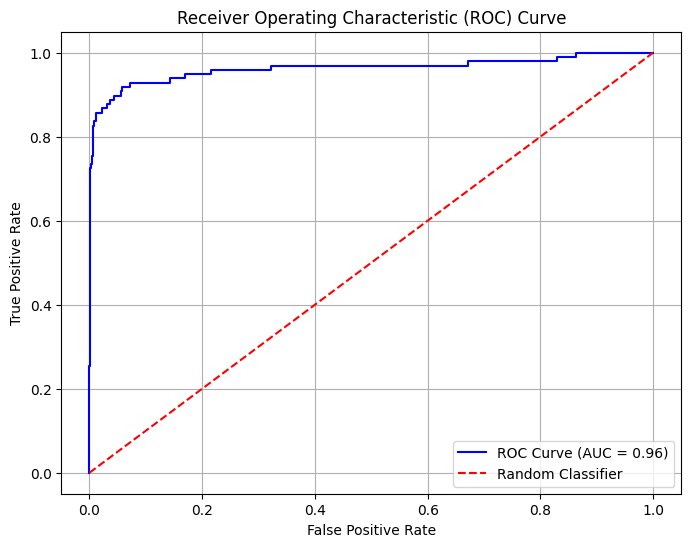

AUC Score: 0.96


In [53]:
#ROC Curve code snippet:

y_pred_proba = model_unbalanced.predict_proba(test_X)[:, 1]
# Calculate FPR and TPR for the ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(test_y, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
auc_score = roc_auc_score(test_y, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

# Correlation

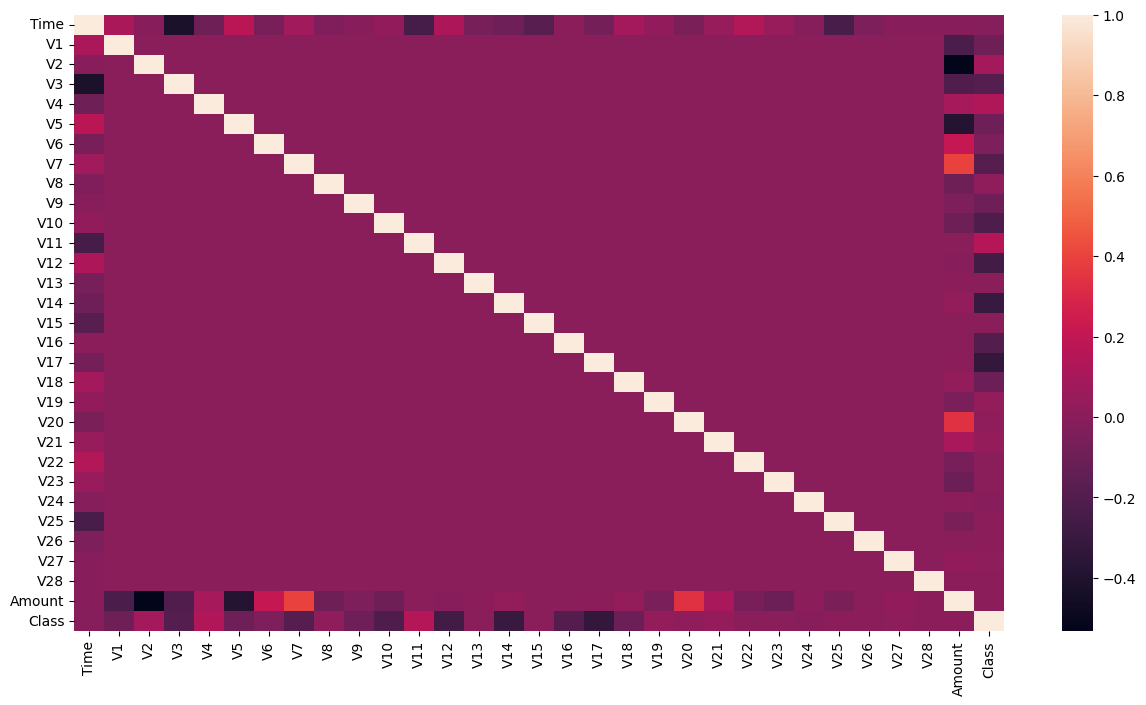

In [56]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr())
plt.show()

In [90]:
scale = StandardScaler()
train_scaled_X = pd.DataFrame(scale.fit_transform(train_X), columns=train_X.columns)
test_scaled_X = pd.DataFrame(scale.transform(test_X), columns=test_X.columns)

# Under Sampling

In [91]:
from imblearn.under_sampling import RandomUnderSampler

In [92]:
undersampler = RandomUnderSampler()

In [93]:
train_scaled_undersampled_X, train_scaled_undersampled_y =  undersampler.fit_resample(train_scaled_X, train_y)

In [94]:
 train_scaled_undersampled_y.value_counts()

,count
Class,
0,394
1,394


In [96]:
train_y.value_counts()

,count
Class,
0,227451
1,394


In [100]:
train_scaled_undersample = pd.concat([train_scaled_undersampled_X, train_scaled_undersampled_y ], axis = 1)

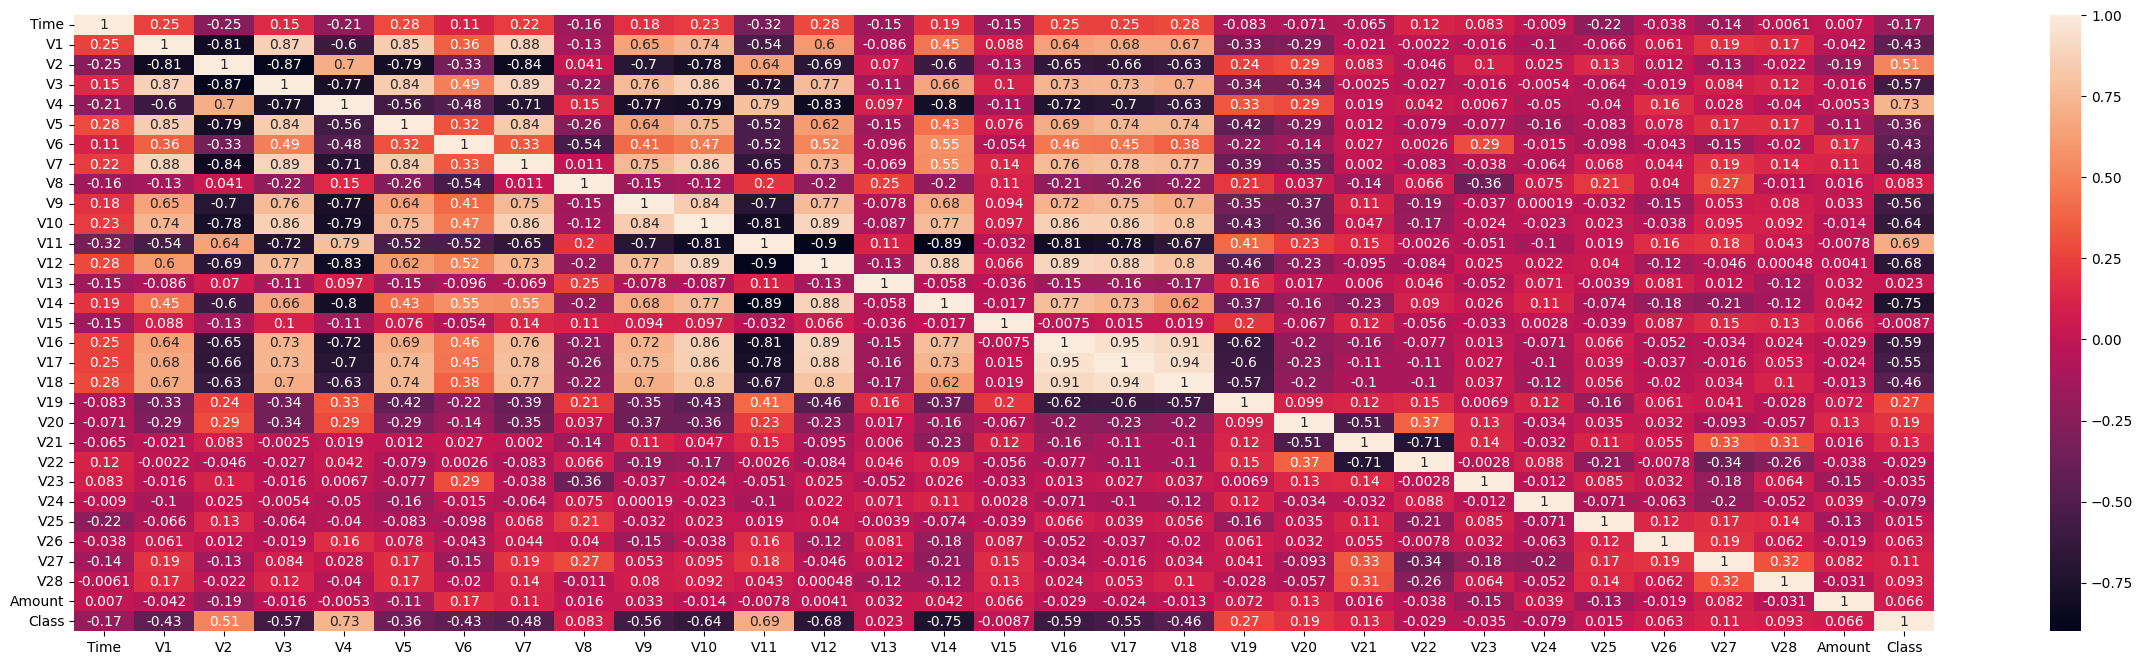

In [103]:
plt.figure(figsize=(30, 8))
sns.heatmap(train_scaled_undersample.corr(), annot = True)
plt.show()

<Axes: xlabel='Class'>

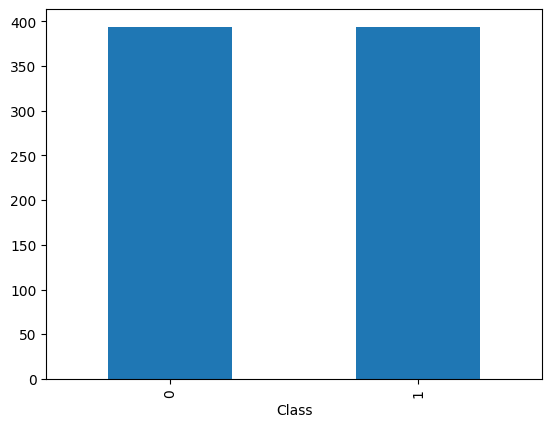

In [104]:
train_scaled_undersample['Class'].value_counts().plot(kind = 'bar')

In [105]:
model_balanced_scaled = LogisticRegression(max_iter=1000)
model_balanced_scaled.fit(train_scaled_undersampled_X, train_scaled_undersampled_y)


LogisticRegression(max_iter=1000)

In [110]:
train_pred = model_balanced_scaled.predict(train_scaled_undersampled_X)
test_pred = model_balanced_scaled.predict(test_scaled_X)


In [111]:
test_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,-0.316016,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.127503,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,-0.008625,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,0.424562,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59


In [112]:
print('Train Accuracy: ', accuracy_score(train_scaled_undersampled_y, train_pred))
print('Test Accuracy: ', accuracy_score(test_y, test_pred))


Train Accuracy:  0.9517766497461929
Test Accuracy:  0.9602893156841403


In [116]:
train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [113]:
print("Train Confusion Matrix : \n",confusion_matrix(train_scaled_undersampled_y, train_pred))
print("Test Confusion Matrix : \n",confusion_matrix(test_y, test_pred))

Train Confusion Matrix : 
 [[385   9]
 [ 29 365]]
Test Confusion Matrix : 
 [[54610  2254]
 [    8    90]]


In [114]:
data['Class'].value_counts(),train_scaled_undersampled_y.value_counts(), test_y.value_counts()

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    394
 1    394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [117]:
print("Train classification Report : \n",classification_report(train_scaled_undersampled_y, train_pred))
print("Test classification Report : \n",classification_report(test_y, test_pred))

Train classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       394
           1       0.98      0.93      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788

Test classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962





```
0 - 200. - 80
1 - 800. - 70


macro average = 80+70/2 - 75

weighted average = 80*200+800*70/1000 = 72
```



In [118]:
print("Train ROC_AUC_SCORE Report : \n",roc_auc_score(train_scaled_undersampled_y, train_pred))
print("Test ROC_AUC_SCORE Report : \n",roc_auc_score(test_y, test_pred))

Train ROC_AUC_SCORE Report : 
 0.9517766497461928
Test ROC_AUC_SCORE Report : 
 0.9393644556866078


In [122]:
test_y_probablity= model_balanced_scaled.predict_proba(test_scaled_X)[:,1]


In [123]:
test_y_probablity

array([1.        , 0.02411821, 0.02617725, ..., 0.07326803, 0.02558513,
       0.91477415])

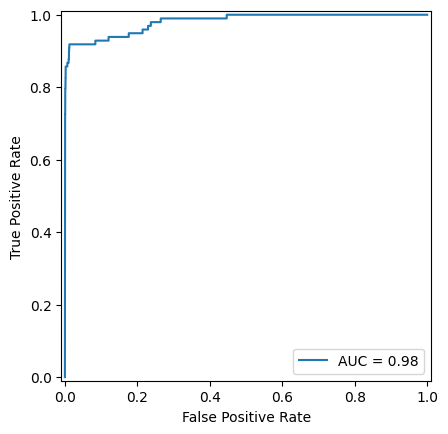

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_probablity)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [127]:
model_balanced_scaled.predict_proba(test_scaled_X)[:, 1]

array([1.        , 0.02411821, 0.02617725, ..., 0.07326803, 0.02558513,
       0.91477415])

Metrics calculated for various thresholds.


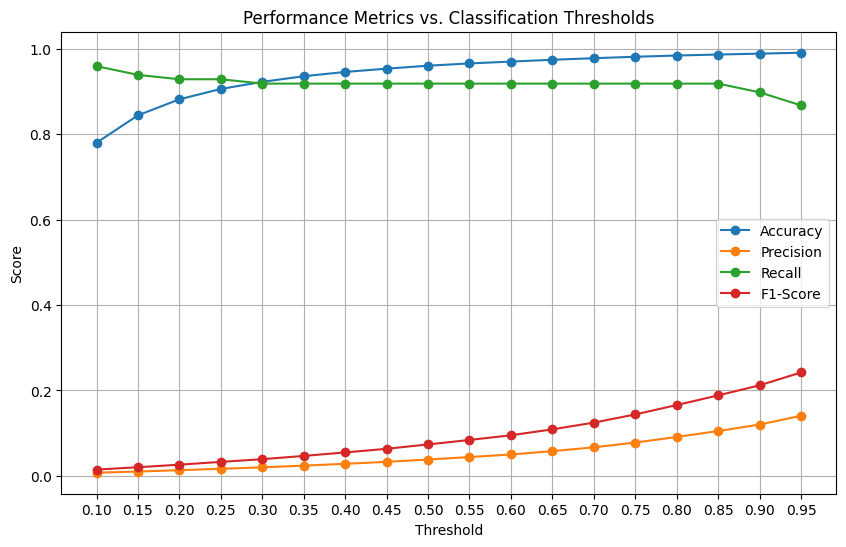

Plotting of performance metrics against classification thresholds is complete.


In [129]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate a range of classification thresholds
thresholds = np.arange(0.1, 1.0, 0.05)

# Get predicted probabilities for the test set
y_pred_proba = model_balanced_scaled.predict_proba(test_scaled_X)[:, 1]

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate through each threshold and calculate metrics
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)

    accuracy_scores.append(accuracy_score(test_y, y_pred_threshold))
    precision_scores.append(precision_score(test_y, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(test_y, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(test_y, y_pred_threshold, zero_division=0))

print("Metrics calculated for various thresholds.")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')

plt.title('Performance Metrics vs. Classification Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

print('Plotting of performance metrics against classification thresholds is complete.')

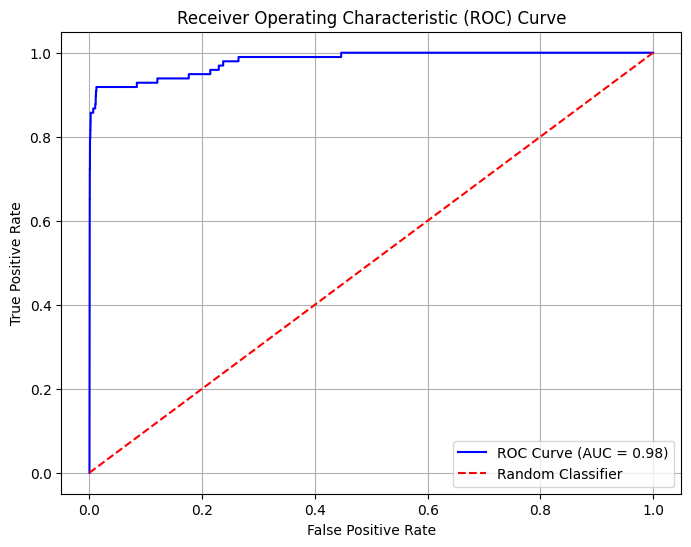

AUC Score: 0.98


In [131]:
#ROC Curve code snippet:

y_pred_proba = model_balanced_scaled.predict_proba(test_scaled_X)[:, 1]
# Calculate FPR and TPR for the ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(test_y, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
auc_score = roc_auc_score(test_y, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

In [156]:
tuned_test_pred__y = np.where(y_pred_proba>0.875,1,0)

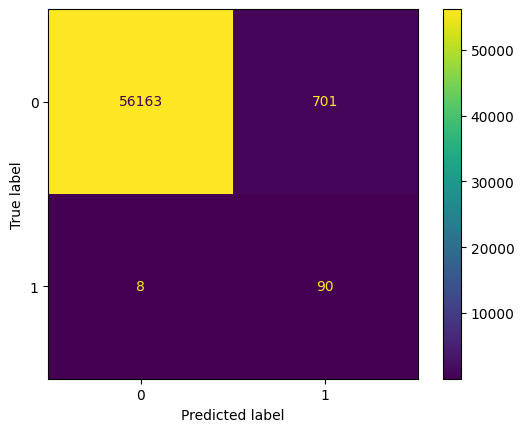

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(test_y, tuned_test_pred__y))
display.plot()

In [168]:
TP_ = []
TN_ = []
FP_ = []
FN_ = []
res = []
for i in np.linspace(0,1,20):
  tuned_test_pred__y = np.where(y_pred_proba>i,1,0)
  conf_matrix = confusion_matrix(test_y, tuned_test_pred__y)
  TP = conf_matrix[1][1]
  TN = conf_matrix[0][0]
  FP = conf_matrix[0][1]
  FN = conf_matrix[1][0]
  TP_.append(TP)
  TN_.append(TN)
  FP_.append(FP)
  FN_.append(FN)
  res.append([i,TP,FP,FN,TN])
  print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")







TP: 98, TN: 0, FP: 56864, FN: 0
TP: 97, TN: 37167, FP: 19697, FN: 1
TP: 93, TN: 44822, FP: 12042, FN: 5
TP: 92, TN: 48400, FP: 8464, FN: 6
TP: 91, TN: 50443, FP: 6421, FN: 7
TP: 91, TN: 51779, FP: 5085, FN: 7
TP: 90, TN: 52726, FP: 4138, FN: 8
TP: 90, TN: 53428, FP: 3436, FN: 8
TP: 90, TN: 53981, FP: 2883, FN: 8
TP: 90, TN: 54422, FP: 2442, FN: 8
TP: 90, TN: 54775, FP: 2089, FN: 8
TP: 90, TN: 55055, FP: 1809, FN: 8
TP: 90, TN: 55309, FP: 1555, FN: 8
TP: 90, TN: 55541, FP: 1323, FN: 8
TP: 90, TN: 55765, FP: 1099, FN: 8
TP: 90, TN: 55924, FP: 940, FN: 8
TP: 90, TN: 56068, FP: 796, FN: 8
TP: 89, TN: 56206, FP: 658, FN: 9
TP: 85, TN: 56338, FP: 526, FN: 13
TP: 0, TN: 56864, FP: 0, FN: 98


In [171]:
pd.DataFrame(res, columns=['Threshold','TP','FP','FN','TN'])

,Threshold,TP,FP,FN,TN
0,0.000000,98,56864,0,0
1,0.052632,97,19697,1,37167
2,0.105263,93,12042,5,44822
3,0.157895,92,8464,6,48400
4,0.210526,91,6421,7,50443
5,0.263158,91,5085,7,51779
6,0.315789,90,4138,8,52726
7,0.368421,90,3436,8,53428
8,0.421053,90,2883,8,53981
9,0.473684,90,2442,8,54422


from matplotlib import pyplot as plt
_df_0['Threshold'].plot(kind='hist', bins=20, title='Threshold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TP'].plot(kind='hist', bins=20, title='TP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FP'].plot(kind='hist', bins=20, title='FP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['FN'].plot(kind='hist', bins=20, title='FN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Threshold', y='TP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TP', y='FP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FP', y='FN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='FN', y='TN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Threshold']
  ys = series['TP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Threshold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Threshold')
_ = plt.ylabel('TP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Threshold']
  ys = series['FP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Threshold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Threshold')
_ = plt.ylabel('FP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Threshold']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Threshold'}, axis=1)
              .sort_values('Threshold', ascending=True))
  xs = counted['Threshold']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Threshold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Threshold')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FN']
  ys = series['TP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('FN', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FN')
_ = plt.ylabel('TP')

from matplotlib import pyplot as plt
_df_12['Threshold'].plot(kind='line', figsize=(8, 4), title='Threshold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['TP'].plot(kind='line', figsize=(8, 4), title='TP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['FP'].plot(kind='line', figsize=(8, 4), title='FP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['FN'].plot(kind='line', figsize=(8, 4), title='FN')
plt.gca().spines[['top', 'right']].set_visible(False)

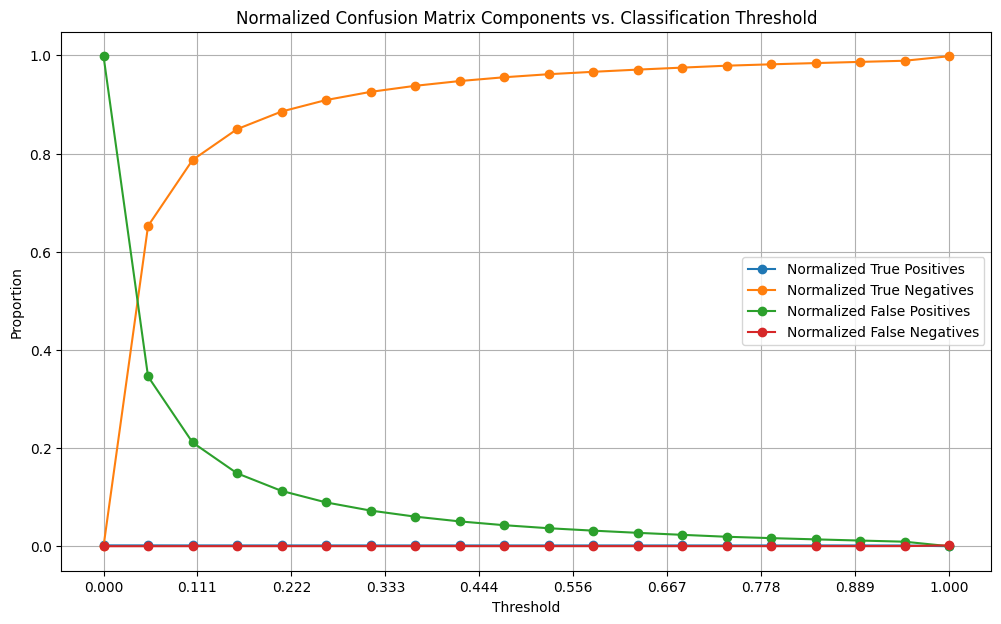

In [173]:
total_samples = len(test_y)

TP_norm = [tp / total_samples for tp in TP_]
TN_norm = [tn / total_samples for tn in TN_]
FP_norm = [fp / total_samples for fp in FP_]
FN_norm = [fn / total_samples for fn in FN_]

plt.figure(figsize=(12, 7))
plt.plot(thresholds_list, TP_norm, label='Normalized True Positives', marker='o', linestyle='-')
plt.plot(thresholds_list, TN_norm, label='Normalized True Negatives', marker='o', linestyle='-')
plt.plot(thresholds_list, FP_norm, label='Normalized False Positives', marker='o', linestyle='-')
plt.plot(thresholds_list, FN_norm, label='Normalized False Negatives', marker='o', linestyle='-')

plt.title('Normalized Confusion Matrix Components vs. Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.xticks(np.linspace(0, 1, 10)) # Adjust x-ticks for better readability
plt.grid(True)
plt.legend()
plt.show()


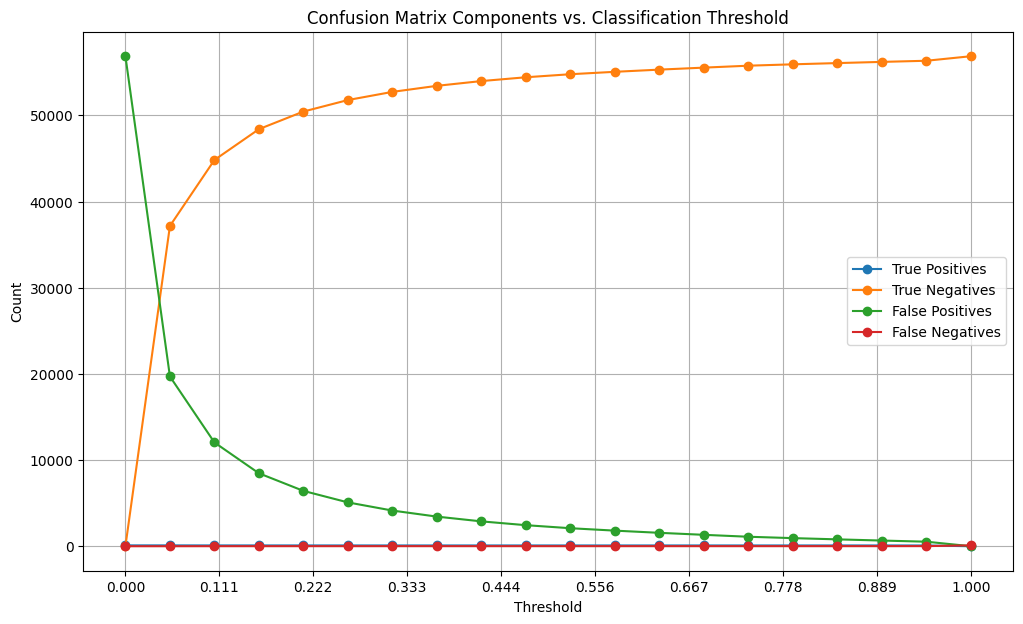

In [172]:
import matplotlib.pyplot as plt

thresholds_list = [item[0] for item in res] # Extract thresholds from the 'res' list

plt.figure(figsize=(12, 7))
plt.plot(thresholds_list, TP_, label='True Positives', marker='o', linestyle='-')
plt.plot(thresholds_list, TN_, label='True Negatives', marker='o', linestyle='-')
plt.plot(thresholds_list, FP_, label='False Positives', marker='o', linestyle='-')
plt.plot(thresholds_list, FN_, label='False Negatives', marker='o', linestyle='-')

plt.title('Confusion Matrix Components vs. Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.xticks(np.linspace(0, 1, 10)) # Adjust x-ticks for better readability
plt.grid(True)
plt.legend()
plt.show()


In [166]:
int(a[0][0])

56163

In [ ]:
Tune the threshold on train data

Test it against the test data





In [176]:
from imblearn.over_sampling import RandomOverSampler

In [177]:
oversampler = RandomOverSampler()

In [178]:
train_scaled_oversampled_X, train_scaled_oversampled_y =  oversampler.fit_resample(train_scaled_X, train_y)

In [179]:
 train_scaled_oversampled_y.value_counts()

,count
Class,
0,227451
1,227451


In [180]:
train_scaled_oversampled_X.duplicated().sum()

np.int64(227789)

228138

In [190]:
from imblearn.over_sampling import KMeansSMOTE
oversampler = KMeansSMOTE(cluster_balance_threshold = 0)
train_scaled_oversampled_X, train_scaled_oversampled_y =  oversampler.fit_resample(train_scaled_X, train_y)
train_scaled_oversampled_y.value_counts()

,count
Class,
1,227456
0,227451


In [191]:
train_scaled_oversampled_X.duplicated().sum()

np.int64(12811)

In [ ]:
KNN ->